# Scientific Computing Coursework

## Ode solvers

Starting with ODE solvers, I coded up a function called "solve_to" which takes an ODE and solves it using either the Euler Method or the Runga Kutta 4 method. The function created takes seven inputs with the first being the ODE. The first thing to note with this is that in every ODE and PDE that I coded up in a function, I added "t" as the first input even if there was no time variable in the actual equation. This is so that all my functions are consistent in case I end up with an ODE or PDE that does end up requiring time as an input. An input that i had to add later on down the line as i tried more complex functions was "args" which takes the arguments of the ODE that is inputted and passes them through the ODE in the function. This is useful as we want to use the ODE function in our solver and not just the ODE at a singular point.

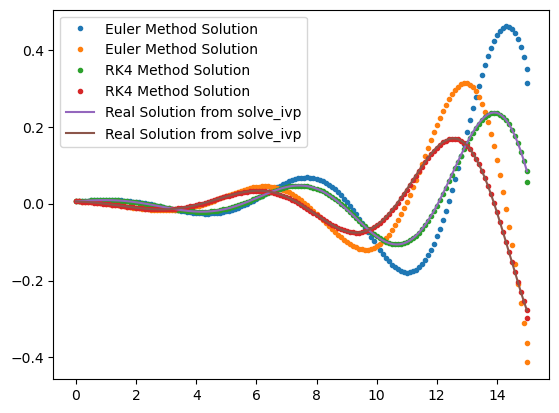

In [25]:
from IVPODEs import solve_to, VanDerPol_Ode
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

[y_total1, t_total1] = solve_to(VanDerPol_Ode,0,15,[0.006,0.006],0.1,'Euler', args = [0.5])
[y_total2, t_total2] = solve_to(VanDerPol_Ode,0,15,[0.006,0.006],0.1,'RK4', args = [0.5])
sol = solve_ivp(VanDerPol_Ode, [0, 15], [0.006,0.006], args=(0.5,), dense_output=True)

t_eval = np.linspace(0, 15, 150)
y_eval = sol.sol(t_eval) 
 

plt.plot(t_total1,y_total1,'.',label = 'Euler Method Solution')
plt.plot(t_total2,y_total2,'.',label = 'RK4 Method Solution')
plt.plot(t_eval,y_eval[0],label = 'Real Solution from solve_ivp')
plt.plot(t_eval,y_eval[1],label = 'Real Solution from solve_ivp')
plt.legend(loc = 'upper left')
plt.show()

The figure above is showing both methods being used to solve the Van Der Pol equation which is a second order ODE. From this figure we can see that the RK4 method does a much better job at solving the ode than the Euler solution. Although this could just be because solve_ivps default solver is also RK4.

# Numerical Shooting

Numerical shooting was tough to understand, however fairly easy to implement once understood. The main function I use is called "shooting" and it pairs the two conditions needed for a limit cycle to occur. One interesting tool i learnt here was pythons unpacking function "*". This allows any lists that are passed next to it to be unpacked into their indivual elements. I also had to implement an if statement that checked if there were any extra conditions as python didn't like having arguments for odes that had no conditions. The next main function i created is called "shooting_solve" which takes the conditions from "shooting" and uses "scipy.optimise.root" to root find the solutions to the conditions for a given ODE.

[-2.01989105e+00  1.25262100e-29  7.62987124e+00]


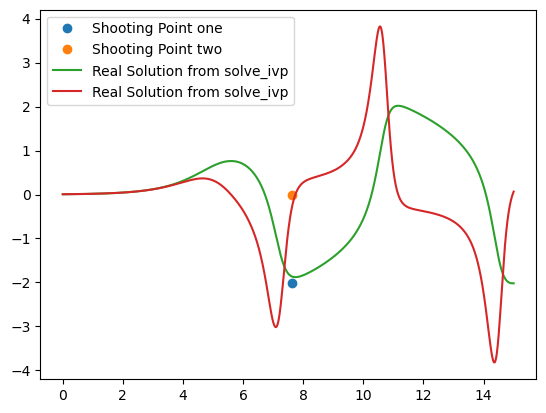

In [48]:
from Numerical_Shooting import shooting_solve
sol = solve_ivp(VanDerPol_Ode, [0, 50], [0.006,0.006], args=(2,), dense_output=True)
t_eval = np.linspace(0, 15, 1500)
y_eval = sol.sol(t_eval) 

sol = shooting_solve(VanDerPol_Ode, [0.5, 0.5,6], [2])
print(sol)

plt.plot(sol[2],sol[0],'o',label = 'Shooting Point one')
plt.plot(sol[2],sol[1],'o',label = 'Shooting Point two')
plt.plot(t_eval,y_eval[0],label = 'Real Solution from solve_ivp')
plt.plot(t_eval,y_eval[1],label = 'Real Solution from solve_ivp')
plt.legend(loc = 'upper left')
plt.show()

In the figure above we can see how the two points lie on the solved Van Der Pol Ode for mu = 2. This is where the start of the limit cycle occurs, hence the strange solution of the ODE compared to the last figure. The first point is slightly off the graph as with the second point but that is most probably due to my initial guesses as they arent always close.

# Numerical Continuation

This part of the coursework was by far the hardest to code up compared to the rest of the course. Most notably pseudo arclength numerical continuation. Both my "natural_parameter" and "pseudo_arclength" functions have the same number of inputs. I chose to do this even tho pseudo arclength requires an extra point to start as this allows me to compare the two a lot easier. To get the second point that is needed for pseudo arclength, i call the natural parameter function to find the next point. I chose to do this instead of allowing the user to input a second known point as i felt it makes it easier to use. In future I could add the functionality to enter in two known points instead of using the natural parameter function so that you can have the choice as to wether you'd like to use your own points or a point collected through natural parameter continuation.

In [ ]:
from Numerical_cont import funct, hopf_ode, natural_parameter, pseudo_parameter

